### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

The independent variables are each of the two conditions of the words, congruent or incongruent. When referring to the congruent condition in this analysis, the words being displayed are color words whose names match the colors in which they are printed. When referring to the incongruent condition in this analysis, the words displayed are color words whose names do not match the colors in which they are printed. The dependent variable is the amount of time it takes to verbally name the ink colors of the words in equally sized lists.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. What kind of statistical test do you expect to perform? Justify your choices.

We want to determine whether the difference of the population mean of the amount of time it takes for the participants to verbally name the ink colors of the words (Stroop task) in the incongruent condition vs. the congruent condition is statistically significant.  

Null Hypothesis: There is no difference between the conditions in the average amount of time it takes for the Stroop task. 

or $H_{0}$:  $\mu_{inc}$  -  $\mu_{con}$ $=$ $0$


Alternate Hypothesis: There is a statistically significant difference between the conditions in the average amount of time it takes for the Stroop task.

or $H_{1}$:  $\mu_{inc}$  -  $\mu_{con}$ $\neq$ $0$


An appropriate statistical test for use in this analysis is the t-test, which compares two means and whether there is a significant difference or if the difference could have happened by chance. The specific t-test I will use is the paired sample t-test, which compares two different means from the same group. 

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
df_stroop = pd.read_csv('stroopdata.csv')

# Would like to generate some descriptive statistics to obtain better insight into the data
df_stroop.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [2]:
# Adding median since it is not included in the describe function
print ("The median result for each condition:")
print (df_stroop.median())

The median result for each condition:
Congruent      14.3565
Incongruent    21.0175
dtype: float64


The count statistic confirms that the number of results for each condition is equal.  The other descriptive statistics reflect a higher value in Stroop task time in the incongruent condition vs. the congruent condition, including the range.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [3]:
import matplotlib.pyplot as plt

# Included so that the visualizations are plotted inline with the notebook 
% matplotlib inline

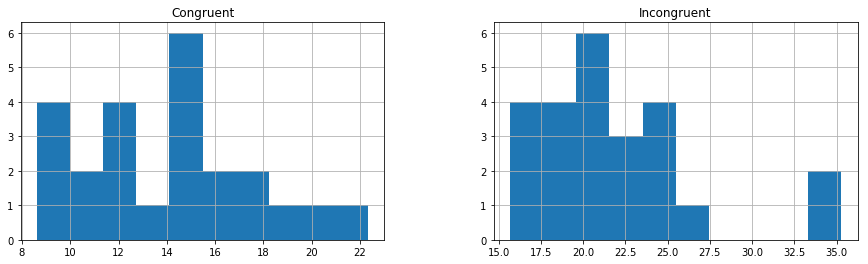

In [4]:
# Reviewing histograms of the two conditions
df_stroop.hist(figsize=(15,4));

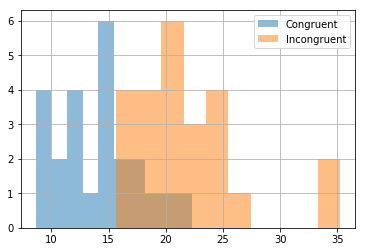

In [5]:
import seaborn as sns #makes visualizations look better

df_stroop.Congruent.hist(alpha=0.5, label='Congruent')
df_stroop.Incongruent.hist(alpha=0.5, label='Incongruent')
plt.legend();

From a comparison of the histograms, there appears to be an outlier reflected in the incongruent condition at approximately 34 seconds. The congruent condition reflects no outliers. For the incongruent condition, all of the datapoints are over 15 seconds.  In contrast, the congruent condition reflects the majority of the datapoints at or under 15 seconds.  

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In order to use the statistical t-test, the following criteria must be in place: 

>* The sample sizes are the same: n1 = n2 = n
>* The populations (where the samples come from) follow the normal distribution (normality criterion)
>* The variances of the populations are also the same (variance criterion)

In [6]:
# Shapiro-Wilk normality test criteria
stats.shapiro(df_stroop.Congruent), stats.shapiro(df_stroop.Incongruent),\

((0.970922589302063, 0.689803421497345),
 (0.85394686460495, 0.0025900385808199644))

Since p > 0.05 for the congruent condition, the data conforms to the normality criterion. However, the incongruent condition data violates the normality criterion and therefore will need to replace the paired t-test with the Wilcoxon signed-rank test. The paired t-test identifies the Null Hypothesis as reflecting that the mean differences of the two conditions are equal, while the Wilcoxon signed-rank test reflects that the median differences of the two conditions are equal.   

In [7]:
# variance test criteria
stats.levene(df_stroop.Congruent, df_stroop.Incongruent)

LeveneResult(statistic=0.2502499448677214, pvalue=0.6192840699128219)

As p > 0.05 the data sets conform to the variance criterion.

In [8]:
# apply the Wilcoxon signed-rank test
t, p = stats.wilcoxon(df_stroop.Congruent, df_stroop.Incongruent)
t, p

(0.0, 1.821529714896801e-05)

p < 0.05. Thus, the null hypothesis is rejected and we argue that incongruent condition is significantly different compared to the congruent condition.

If we were to apply the paired t-test, this is what it would result as...

In [9]:
# applying the paired t-test as demonstrated below (even though the Incongruent group is not normally distributed)
t, p = stats.ttest_rel(df_stroop.Congruent, df_stroop.Incongruent)
t, p

(-8.020706944109957, 4.103000585711178e-08)

p < 0.05 and the null hypothesis is rejected...

The results matched up to my expectations as the null hypothesis is rejected at a confidence interval of 95%, as there is a significant difference in the incongruent condition vs. the congruent condition. 

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

It takes a concerted effort to mute a stimulus we're used to in trained routine and instead focus on muting that stimulus for a  conflicting interference...muting our instinctual reaction when we don't just say the word or the color itself, but it's actual color. Our neural and motor processing is elongated due to the need to focus our concentration refraining from our instinctual and iterative trained reaction, due to an elevation of becoming more prone to errors. With coordinated routine practice, a more automated timely response can emerge gradually. A similar effect could be attained between two multilingual people who overlap in at least two of the same languages and insuring that while one person is communicating solely in one language, the other is conversing only in a different shared language.  

## I have utilized the following URL's for support in addressing Questions 5 and 6.  
>* http://pytolearn.csd.auth.gr/d1-hyptest/12/ttest-paired.html\, 
>* http://benalexkeen.com/comparative-statistics-in-python-using-scipy/, 
>* https://www.researchgate.net/post/What_Statistical_test_should_I_use
>* https://en.wikipedia.org/wiki/Stroop_effect